# COMS3007:Machine Learning 2020

## Students:

#### 1836213

#### 1810589

### Importing whats needed

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')

### Reading Training and Test datasets

In [4]:
train_csv = pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')
print('There are %s examples in the training set and %s examples in the test set' % (train_csv.shape[0], test_csv.shape[0]))
print('\n')
print('The different variables that we have at our disposal are : %s' % ', '.join(list(train_csv.columns)))


There are 891 examples in the training set and 418 examples in the test set


The different variables that we have at our disposal are : PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked


In [6]:
train_csv.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test_csv.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [10]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Who should live or Die (Male and Female)

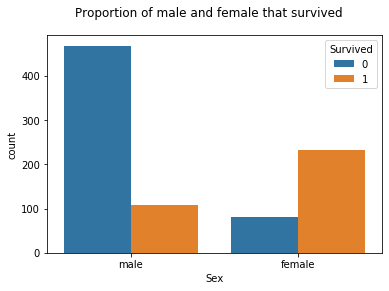

In [12]:
plt.figure()
plt.suptitle('Proportion of male and female that survived')
g = sns.countplot(x="Sex", hue='Survived', data=train_csv);
plt.show()

#### Therefore if you were a female on board you had far more luck to survive

### Proportion of people that survived depending on their socio-economic status

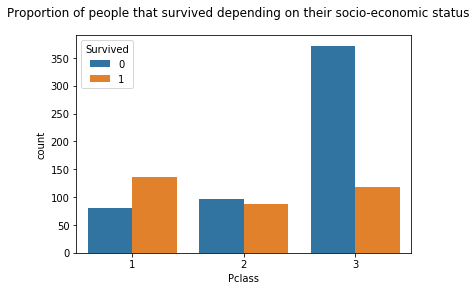

In [13]:
plt.figure()
plt.suptitle('Proportion of people that survived depending on their socio-economic status')
g = sns.countplot(x="Pclass", hue='Survived', data=train_csv);
plt.show()


#### Again we can see that chances are not equal for everyone. If you are from a 'lower' status you had far more chance to die that if you came from a 'upper' status

### checking for missing values

In [14]:
train_csv.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Age Missing Data

In [15]:
print('Percent of missing "Age" records is %.2f%%' %((train_csv['Age'].isnull().sum()/train_csv.shape[0])*100))

Percent of missing "Age" records is 19.87%


### The Age variable in general

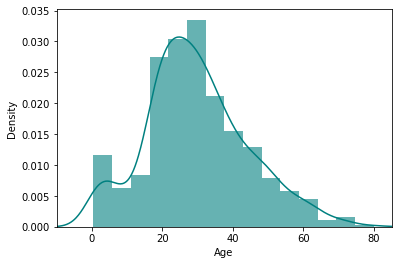

In [16]:
ax = train_csv["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_csv["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

#### Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.

### Mean Age

In [38]:
print('The mean of "Age" is %.2f' %(train_csv["Age"].mean(skipna=True)))

The mean of "Age" is 29.70


### Median Age

In [18]:
print('The median of "Age" is %.2f' %(train_csv["Age"].median(skipna=True)))

The median of "Age" is 28.00


### Cabin Missing Data

#### percent of missing "Cabin"

In [19]:
print('Percent of missing "Cabin" records is %.2f%%' %((train_csv['Cabin'].isnull().sum()/train_csv.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


#### 77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise. We'll ignore this variable in our model.

### Embarked Missing values

#### percent of missing "Embarked"

In [20]:
print('Percent of missing "Embarked" records is %.2f%%' %((train_csv['Embarked'].isnull().sum()/train_csv.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


#### There are only 2 (0.22%) missing values for "Embarked", so we can just impute with the port where most people boarded.

In [21]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):


S    644
C    168
Q     77
Name: Embarked, dtype: int64


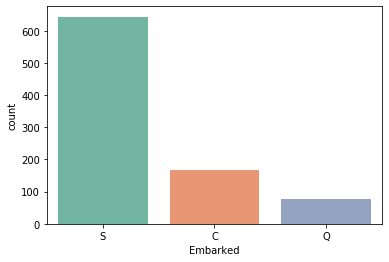

In [22]:
print(train_csv['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_csv, palette='Set2')
plt.show()

In [23]:
print('The most common boarding port of embarkation is %s.' %train_csv['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


#### By far the most passengers boarded in Southhampton, so we'll impute those 2 NaN's w/ "S"

### Building The Model

In [24]:
def label_encoding(dataframe, labels):
    """
    Encode categorical variable into numerical values
    """

    le = LabelEncoder()
    for label in labels:
        le.fit(dataframe[label])
        dataframe[label] = le.transform(dataframe[label])

    return dataframe


In [25]:
def normalize_features(X_train):
    """
    Normalize the features by substracting the mean 
    and dividing by the standard deviation
    """

    for features in X_train:
        feats = X_train[features].tolist()
        mean = np.mean(feats)
        std = np.std(feats)
        feats = (feats - mean)/std
        X_train[features] = feats

    return X_train

In [26]:
def get_training_data():
    """
    Clean the data by processing the nan values
    and normalizing the features
    """
    train_csv = pd.read_csv('train.csv')
    train_csv['Cabin'] = train_csv['Cabin'].fillna('C0')
    train_csv['Embarked'] = train_csv['Embarked'].fillna(train_csv['Embarked'].value_counts().idxmax())
    train_csv['Age'] = train_csv['Age'].fillna(train_csv['Age'].median())
    train_csv = label_encoding(train_csv, ['Sex', 'Ticket', 'Cabin', 'Embarked'])

    X_train = train_csv[['Pclass', 'Sex', 'Age',  'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
    Y_train = train_csv['Survived']

    normalize_features(X_train)

    return X_train.as_matrix(), Y_train.as_matrix()


In [39]:
def get_testing_data():

    test_csv = pd.read_csv('test.csv')

    test_csv['Cabin'] = test_csv['Cabin'].fillna('C0')
    test_csv['Embarked'] = test_csv['Embarked'].fillna(test_csv['Embarked'].value_counts().idxmax())
    test_csv['Age'] = test_csv['Age'].fillna(test_csv['Age'].median())
    test_csv['Fare'] = test_csv['Fare'].fillna(test_csv['Fare'].median())
    test_csv = label_encoding(test_csv, ['Sex', 'Ticket', 'Cabin', 'Embarked'])

    X_test = test_csv[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]

    normalize_features(X_test)

    return X_test.as_matrix(), test_csv['PassengerId']

### Logistic regression Training ----------------------

In [40]:
X_train, Y_train = get_training_data()

X_train, Y_train = get_training_data()

### Hyperparameters initialization

In [41]:
lr = 0.05

### Parameters initialization

In [42]:
weights = np.random.normal(0, 0.1, 9)
biais = random.normalvariate(0, 0.1)

In [43]:
m = X_train.shape[0]
for epoch in range(300):

    # Forward pass
    Z = np.dot(X_train, weights) + biais
    A = 1 / (1 + np.exp(-Z))

    #Loss Computation
    J = np.sum(-(Y_train * np.log(A) + (1 - Y_train) * np.log(1 - A))) / m

    # Gradient computation
    dZ = A - Y_train
    dw = np.dot(dZ, X_train) / m
    db = np.sum(dZ) / m

    # Update weights
    weights = weights - lr * dw
    biais = biais - lr * db
    
    if epoch % 10 == 0:
        print("epoch %s - loss %s" % (epoch, J))


epoch 0 - loss 0.6539813558148897
epoch 10 - loss 0.6009290000634454
epoch 20 - loss 0.5648378174673966
epoch 30 - loss 0.5393862806054934
epoch 40 - loss 0.520781829195707
epoch 50 - loss 0.5067430463464032
epoch 60 - loss 0.49585994556070756
epoch 70 - loss 0.4872310961596088
epoch 80 - loss 0.4802602415983118
epoch 90 - loss 0.47454020180545964
epoch 100 - loss 0.4697847208229445
epoch 110 - loss 0.4657872346033583
epoch 120 - loss 0.46239517634156746
epoch 130 - loss 0.45949350931910404
epoch 140 - loss 0.45699389392076517
epoch 150 - loss 0.4548273862909403
epoch 160 - loss 0.45293940580584835
epoch 170 - loss 0.4512861938895918
epoch 180 - loss 0.44983227427659556
epoch 190 - loss 0.44854859925427415
epoch 200 - loss 0.44741117457847174
epoch 210 - loss 0.446400024218189
epoch 220 - loss 0.4454984002699606
epoch 230 - loss 0.44469217241892295
epoch 240 - loss 0.4439693507341764
epoch 250 - loss 0.44331970877182136
epoch 260 - loss 0.44273448305302765
epoch 270 - loss 0.4422061313

### Logistic Regression Prediction

In [44]:
 X_test, PassengerId = get_testing_data()

preds = []
for feats in X_test:

    z = np.dot(feats, weights) + biais
    a = 1 / (1 + np.exp(-z))

    if a > 0.5:
        preds.append(1)
    elif a <= 0.5:
        preds.append(0)
      
sample_ids = np.random.choice(PassengerId, 100)

for id, value in enumerate(sample_ids):
    print('Passenger id : %s - Survived : %s' % (value, preds[id]))
    

Passenger id : 944 - Survived : 0
Passenger id : 907 - Survived : 0
Passenger id : 1194 - Survived : 0
Passenger id : 896 - Survived : 0
Passenger id : 1134 - Survived : 1
Passenger id : 1012 - Survived : 0
Passenger id : 1257 - Survived : 1
Passenger id : 1047 - Survived : 0
Passenger id : 995 - Survived : 1
Passenger id : 1170 - Survived : 0
Passenger id : 966 - Survived : 0
Passenger id : 1205 - Survived : 0
Passenger id : 1152 - Survived : 1
Passenger id : 1222 - Survived : 0
Passenger id : 1037 - Survived : 1
Passenger id : 1189 - Survived : 1
Passenger id : 1238 - Survived : 0
Passenger id : 1153 - Survived : 0
Passenger id : 924 - Survived : 0
Passenger id : 942 - Survived : 1
Passenger id : 1185 - Survived : 0
Passenger id : 1158 - Survived : 0
Passenger id : 1206 - Survived : 1
Passenger id : 1237 - Survived : 0
Passenger id : 1089 - Survived : 1
Passenger id : 1221 - Survived : 0
Passenger id : 1296 - Survived : 1
Passenger id : 931 - Survived : 0
Passenger id : 1271 - Surviv

### The Acuracy

In [45]:
gendermodel_csv = pd.read_csv('gender_submission.csv')
accuracy = accuracy_score(list(gendermodel_csv['Survived']), preds)
print('\n')
print('The accuracy of the model is  %s  ' % accuracy)




The accuracy of the model is  0.9258373205741627  
